In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pwd()

'C:\\Users\\manth\\Documents\\Master Program\\Business Intelligence\\Labs\\Lab3'

In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
train_df = train.drop(['Ticket'], axis=1)
test_df = test.drop(['Ticket'], axis=1)

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [64]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [65]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [66]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,0,0.339009
1,1,0.553571
2,2,0.389610


In [67]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


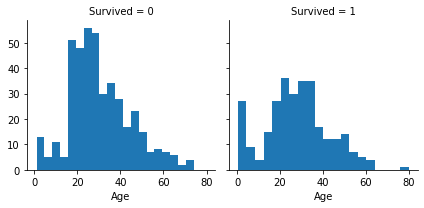

In [68]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


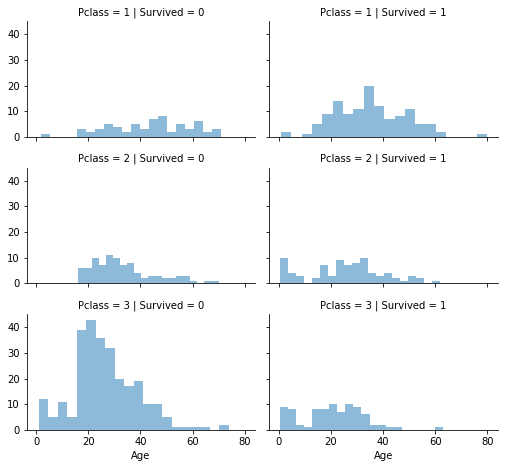

In [69]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


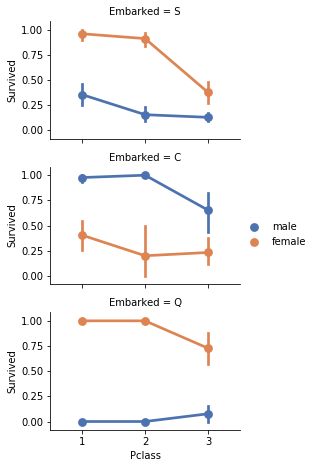

In [70]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


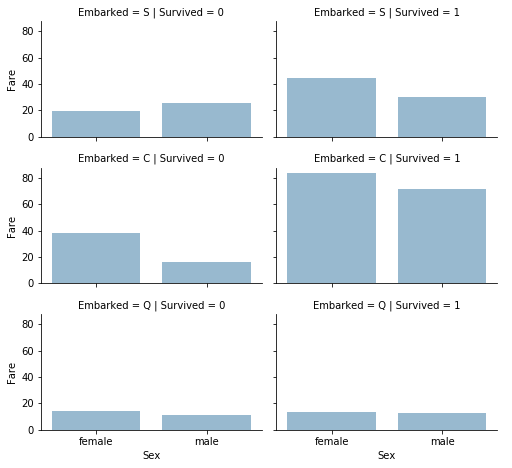

In [71]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

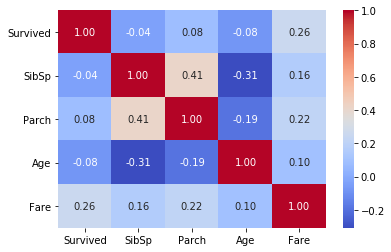

In [72]:
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [7]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [8]:
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [9]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [10]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [11]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [12]:
test_df['Title'] = test_df['Title'].replace(['Col','Dona', 'Dr', 'Rev'], 'Rare')

test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

In [13]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [14]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)

In [15]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [16]:
test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

In [17]:
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [18]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,71.2833,C85,C,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,53.1000,C123,S,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,1


In [20]:
train_df.groupby('Title')['Age'].mean()

Title
1    32.368090
2    21.845638
3    35.788991
4     4.574167
5    45.545455
Name: Age, dtype: float64

In [21]:
test_df.groupby('Title')['Age'].mean()

Title
1    32.000000
2    21.774844
3    38.903226
4     7.406471
5    43.833333
Name: Age, dtype: float64

In [22]:
## Assigning the NaN Values with the Ceil values of the mean ages
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Other'),'Age']=46

C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [23]:
## Assigning the NaN Values with the Ceil values of the mean ages
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Mr'),'Age']=32
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Mrs'),'Age']=39
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Master'),'Age']=8
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Miss'),'Age']=22
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Other'),'Age']=44

In [24]:
train_df.Age = train_df.Age.replace(np.nan)
train_df["Age"].dropna(how ='any', inplace = True)

In [25]:
test_df.Age = test_df.Age.replace(np.nan)
test_df["Age"].dropna(how ='any', inplace = True)

In [26]:
train_df.Age.isnull().any()

False

In [27]:
test_df.Age.isnull().any()

False

In [28]:
train_df["Age"] = train_df["Age"].astype(int)

In [29]:
test_df["Age"] = test_df["Age"].astype(int)

In [30]:
train_df['age']=0
train_df.loc[ train_df['Age'] <= 16, 'age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'age'] = 3
train_df.loc[ train_df['Age'] > 64, 'age'] = 4

In [31]:
test_df['age']=0
test_df.loc[ test_df['Age'] <= 16, 'age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'age'] = 3
test_df.loc[ test_df['Age'] > 64, 'age'] = 4

In [32]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age
0,0,3,0,22,1,0,7.2500,NaN,S,1,1
1,1,1,1,38,1,0,71.2833,C85,C,3,2
2,1,3,1,26,0,0,7.9250,NaN,S,2,1
3,1,1,1,35,1,0,53.1000,C123,S,3,2
4,0,3,0,35,0,0,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,NaN,S,5,1
887,1,1,1,19,0,0,30.0000,B42,S,2,1
888,0,3,1,19,1,2,23.4500,NaN,S,2,1
889,1,1,0,26,0,0,30.0000,C148,C,1,1


In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)

In [35]:
test_df['Embarked'] = test_df['Embarked'].fillna(freq_port)

In [36]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [38]:
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [39]:
test_df.isnull().values.any().sum()

1

In [40]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age
0,892,3,0,34,0,0,7.8292,NaN,2,1,2
1,893,3,1,47,1,0,7.0000,NaN,0,3,2
2,894,2,0,62,0,0,9.6875,NaN,2,1,3
3,895,3,0,27,0,0,8.6625,NaN,0,1,1
4,896,3,1,22,1,1,12.2875,NaN,0,3,1


In [41]:
train_df[['age', 'Survived']].groupby(['age'], as_index=False).mean()

,age,Survived
0,0,0.519380
1,1,0.344340
2,2,0.386555
3,3,0.390805
4,4,0.230769


In [42]:
train_df.isnull().values.any().sum()

1

In [43]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)

In [45]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

In [46]:
train_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0,0.197309
1,1,0.308756
2,2,0.445415
3,3,0.581081


In [47]:
test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

In [48]:
train_df = train_df.drop(['FareBand'], axis=1)
test_df = test_df.drop(['FareBand','PassengerId'], axis=1)

In [49]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age
0,0,3,0,22,1,0,0,NaN,0,1,1
1,1,1,1,38,1,0,3,C85,1,3,2
2,1,3,1,26,0,0,1,NaN,0,2,1
3,1,1,1,35,1,0,3,C123,0,3,2
4,0,3,0,35,0,0,1,NaN,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,1,NaN,0,5,1
887,1,1,1,19,0,0,2,B42,0,2,1
888,0,3,1,19,1,2,2,NaN,0,2,1
889,1,1,0,26,0,0,2,C148,1,1,1


In [50]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [51]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

train_df['Cabin'] = train_df['Cabin'].fillna("U0")
train_df['Deck'] = train_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_df['Deck'] = train_df['Deck'].map(deck)
train_df['Deck'] = train_df['Deck'].fillna(0)
train_df['Deck'] = train_df['Deck'].astype(int)

In [52]:
test_df['Cabin'] = test_df['Cabin'].fillna("U0")
test_df['Deck'] = test_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
test_df['Deck'] = test_df['Deck'].map(deck)
test_df['Deck'] = test_df['Deck'].fillna(0)
test_df['Deck'] = test_df['Deck'].astype(int)

In [53]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [54]:
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

In [55]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,0,3,0,1,0,0,0,1,1,8
1,1,1,1,1,0,3,1,3,2,3
2,1,3,1,0,0,1,0,2,1,8
3,1,1,1,1,0,3,0,3,2,3
4,0,3,0,0,0,1,0,1,2,8


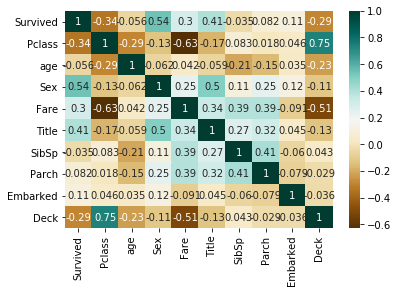

In [56]:
g = sns.heatmap(train_df[["Survived","Pclass","age","Sex","Fare","Title","SibSp","Parch","Embarked",'Deck']].corr(),cmap="BrBG",annot=True)

In [57]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,3,0,0,0,0,2,1,2,8
1,3,1,1,0,0,0,3,2,8
2,2,0,0,0,1,2,1,3,8
3,3,0,0,0,1,0,1,1,8
4,3,1,1,1,1,0,3,1,8


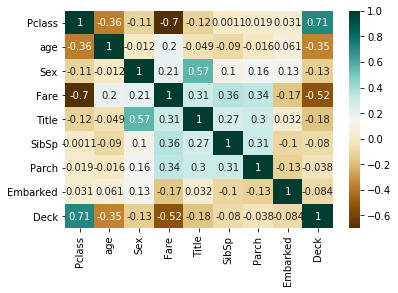

In [58]:
g = sns.heatmap(test_df[["Pclass","age","Sex","Fare","Title","SibSp","Parch","Embarked",'Deck']].corr(),cmap="BrBG",annot=True)

In [59]:
trainf = train_df.copy()
testf = test_df.copy()

In [60]:
X_train = trainf.drop("Survived", axis=1)
Y_train = trainf["Survived"]
X_test  = testf.copy()

In [61]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [62]:
acc_decision_tree

91.58